In [1]:
import pandas as pd

In [3]:
data = pd.read_csv("LOG.csv", sep=";")

In [4]:
data = data[data["SPREAD"] > 0.04]

In [5]:
data.head()

,TIMESTAMP,SPREAD,AMOUNT,BUY_PRICE,BUY_EXCHANGE,SELL_PRICE,SELL_EXCHANGE,PAIR
447162,1611219496308,0.040061,0.017839,27547.05,Binance,28650.6,Kraken,BTC_EUR
447285,1611219496331,0.040441,0.250000,27536.97,Bitstamp,28650.6,Kraken,BTC_EUR
447286,1611219496331,0.040434,0.050000,27536.97,Bitstamp,28650.4,Kraken,BTC_EUR
447287,1611219496331,0.040220,1.391624,27542.63,Bitstamp,28650.4,Kraken,BTC_EUR
447288,1611219496331,0.040217,0.608376,27542.63,Bitstamp,28650.3,Kraken,BTC_EUR


In [6]:
data["DATE"] = pd.to_datetime(data["TIMESTAMP"], unit="ms")

In [8]:
data["MINUTE"] = data["DATE"].dt.to_period('T')

In [9]:
data.head()

,TIMESTAMP,SPREAD,AMOUNT,BUY_PRICE,BUY_EXCHANGE,SELL_PRICE,SELL_EXCHANGE,PAIR,DATE,MINUTE
447162,1611219496308,0.040061,0.017839,27547.05,Binance,28650.6,Kraken,BTC_EUR,2021-01-21 08:58:16.308,2021-01-21 08:58
447285,1611219496331,0.040441,0.250000,27536.97,Bitstamp,28650.6,Kraken,BTC_EUR,2021-01-21 08:58:16.331,2021-01-21 08:58
447286,1611219496331,0.040434,0.050000,27536.97,Bitstamp,28650.4,Kraken,BTC_EUR,2021-01-21 08:58:16.331,2021-01-21 08:58
447287,1611219496331,0.040220,1.391624,27542.63,Bitstamp,28650.4,Kraken,BTC_EUR,2021-01-21 08:58:16.331,2021-01-21 08:58
447288,1611219496331,0.040217,0.608376,27542.63,Bitstamp,28650.3,Kraken,BTC_EUR,2021-01-21 08:58:16.331,2021-01-21 08:58


In [27]:
grouped = data[["BUY_EXCHANGE", "SELL_EXCHANGE", "PAIR", "MINUTE", "SPREAD"]].groupby(["BUY_EXCHANGE", "SELL_EXCHANGE", "PAIR", "MINUTE"]).describe()

In [28]:
grouped.head()

SPREAD            \
                                                     count      mean   
BUY_EXCHANGE SELL_EXCHANGE PAIR    MINUTE                              
Binance      Kraken        BTC_EUR 2021-01-21 08:58  340.0  0.040991   
                                   2021-01-21 08:59  776.0  0.041496   
                                   2021-01-21 09:00  721.0  0.042846   
                                   2021-01-21 09:02  306.0  0.041138   
                                   2021-01-21 09:03  370.0  0.041188   

                                                                         \
                                                          std       min   
BUY_EXCHANGE SELL_EXCHANGE PAIR    MINUTE                                 
Binance      Kraken        BTC_EUR 2021-01-21 08:58  0.000692  0.040002   
                                   2021-01-21 08:59  0.000893  0.040001   
                                   2021-01-21 09:00  0.001442  0.040048   
                                   2021-01-21 09:02  0.000783  0.040007   
                                   2021-01-21 09:03  0.000872  0.040003   

                                                                         \
                                                          25%       50%   
BUY_EXCHANGE SELL_EXCHANGE PAIR    MINUTE                                 
Binance      Kraken        BTC_EUR 2021-01-21 08:58  0.040408  0.040920   
                                   2021-01-21 08:59  0.040773  0.041363   
                                   2021-01-21 09:00  0.041804  0.042729   
                                   2021-01-21 09:02  0.040436  0.041076   
                                   2021-01-21 09:03  0.040403  0.041085   

                                                                         
                                                          75%       max  
BUY_EXCHANGE SELL_EXCHANGE PAIR    MINUTE                                
Binance      Kraken        BTC_EUR 2021-01-21 08:58  0.041453  0.042875  
                                   2021-01-21 08:59  0.042032  0.044260  
                                   2021-01-21 09:00  0.043908  0.046935  
                                   2021-01-21 09:02  0.041818  0.043246  
                                   2021-01-21 09:03  0.041833  0.043231

In [35]:
grouped = grouped[('SPREAD', 'mean')]

In [42]:
combis = grouped.index.to_frame()

In [72]:
combis.index = combis.index.droplevel(['PAIR', 'BUY_EXCHANGE', 'SELL_EXCHANGE'])

In [75]:
combis = combis.drop(['MINUTE'], axis=1)

In [76]:
combis.size

132

In [78]:
combis.head()

,BUY_EXCHANGE,SELL_EXCHANGE,PAIR
MINUTE,,,
2021-01-21 08:58,Binance,Kraken,BTC_EUR
2021-01-21 08:59,Binance,Kraken,BTC_EUR
2021-01-21 09:00,Binance,Kraken,BTC_EUR
2021-01-21 09:02,Binance,Kraken,BTC_EUR
2021-01-21 09:03,Binance,Kraken,BTC_EUR


combis["EXCHANGES"] = combis["BUY_EXCHANGE"] + "-" + combis["SELL_EXCHANGE"]

In [79]:
combis["EXCHANGES"] = combis["BUY_EXCHANGE"] + "-" + combis["SELL_EXCHANGE"]

In [81]:
combis.head()

,BUY_EXCHANGE,SELL_EXCHANGE,PAIR,EXCHANGES
MINUTE,,,,
2021-01-21 08:58,Binance,Kraken,BTC_EUR,Binance-Kraken
2021-01-21 08:59,Binance,Kraken,BTC_EUR,Binance-Kraken
2021-01-21 09:00,Binance,Kraken,BTC_EUR,Binance-Kraken
2021-01-21 09:02,Binance,Kraken,BTC_EUR,Binance-Kraken
2021-01-21 09:03,Binance,Kraken,BTC_EUR,Binance-Kraken


In [83]:
combis = combis.drop(['BUY_EXCHANGE', 'SELL_EXCHANGE'], axis=1)

In [84]:
combis.head()

,PAIR,EXCHANGES
MINUTE,,
2021-01-21 08:58,BTC_EUR,Binance-Kraken
2021-01-21 08:59,BTC_EUR,Binance-Kraken
2021-01-21 09:00,BTC_EUR,Binance-Kraken
2021-01-21 09:02,BTC_EUR,Binance-Kraken
2021-01-21 09:03,BTC_EUR,Binance-Kraken


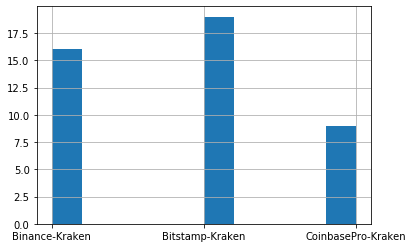

In [85]:
combis["EXCHANGES"].hist()

In [86]:
combis.describe()

,PAIR,EXCHANGES
count,44,44
unique,2,3
top,BTC_EUR,Bitstamp-Kraken
freq,40,19


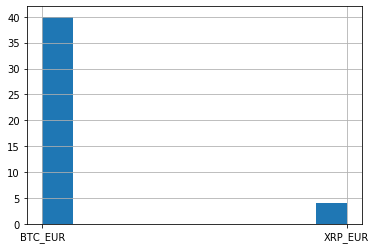

In [87]:
combis["PAIR"].hist()

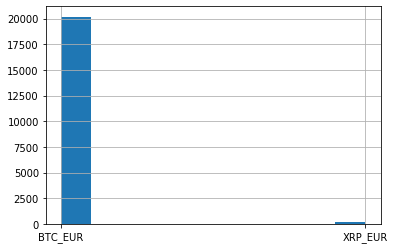

In [88]:
data["PAIR"].hist()

In [90]:
data

203440

In [91]:
all = pd.read_csv("LOG.csv", sep=";")

In [92]:
all["EXCHANGES"] = all["BUY_EXCHANGE"] + "-" + all["SELL_EXCHANGE"]

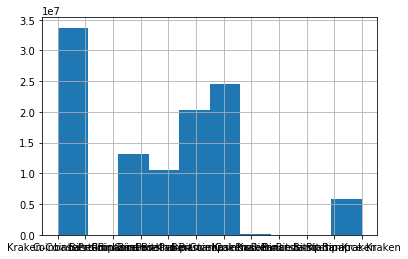

In [93]:
all["EXCHANGES"].hist()

In [94]:
import matplotlib.pyplot as plt

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

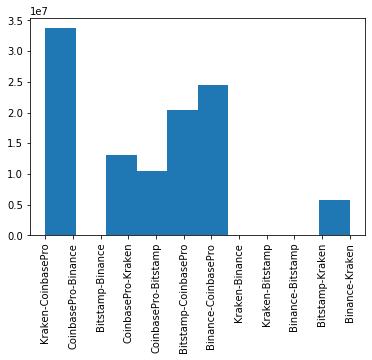

In [95]:
p = plt.hist(all["EXCHANGES"])
plt.xticks(rotation='vertical')

In [96]:
plt.show()

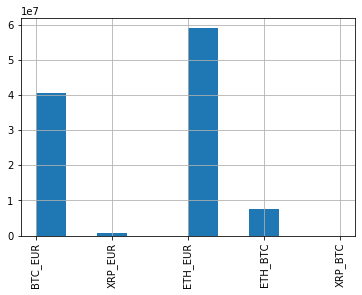

In [97]:
all["PAIR"].hist(xrot=90)